# Data Cleaning and Exploratory Data Analysis (EDA)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns
pd.set_option('display.max_columns', None)

In [2]:
# Load the dataset
df = pd.read_csv('ecommerce_furniture_dataset_2024.csv')
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


## 1. Basic Dataset Information

In [3]:
# Dataset info
df.info()

# Summary statistics
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


,productTitle,originalPrice,price,sold,tagText
count,2000,487,2000,2000.000000,1997
unique,1793,453,1802,NaN,100
top,"3 Pieces Rocking Wicker Bistro Set, Patio Outd...",$46.45,$0.99,NaN,Free shipping
freq,6,4,8,NaN,1880
mean,NaN,NaN,NaN,23.493500,NaN
std,NaN,NaN,NaN,254.094061,NaN
min,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN
75%,NaN,NaN,NaN,9.000000,NaN


## 2. Checking Missing Values

In [4]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

originalPrice    1513
tagText             3
dtype: int64

## 3. Handling Missing Values
We will fill missing numerical values with the median and categorical values with the mode.

In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

## 4. Removing Duplicates

In [6]:
df.drop_duplicates(inplace=True)

## 5. Univariate Analysis

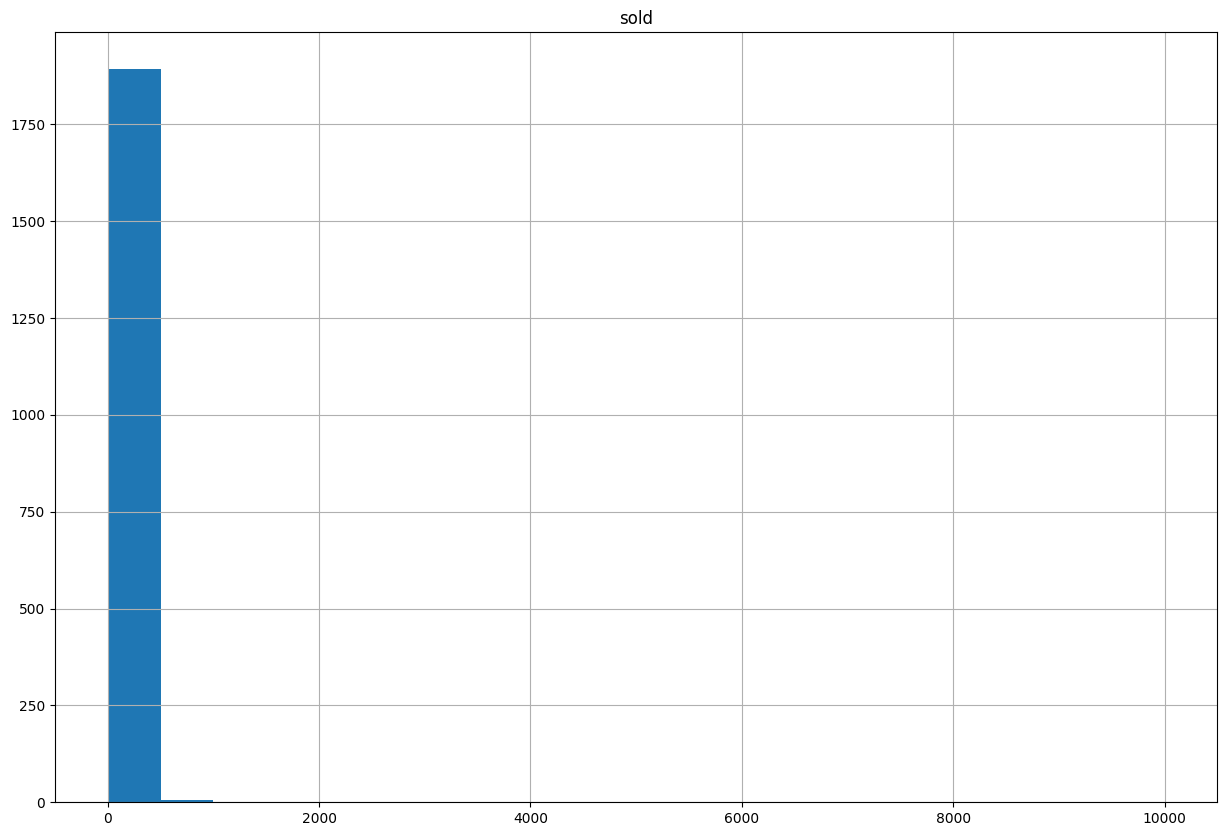

C:\Users\Tarun Dev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Tarun Dev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Tarun Dev\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54801 (\N{HANGUL SYLLABLE HYEOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tarun Dev\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53441 (\N{HANGUL SYLLABLE TAG}) missing from current font.
  

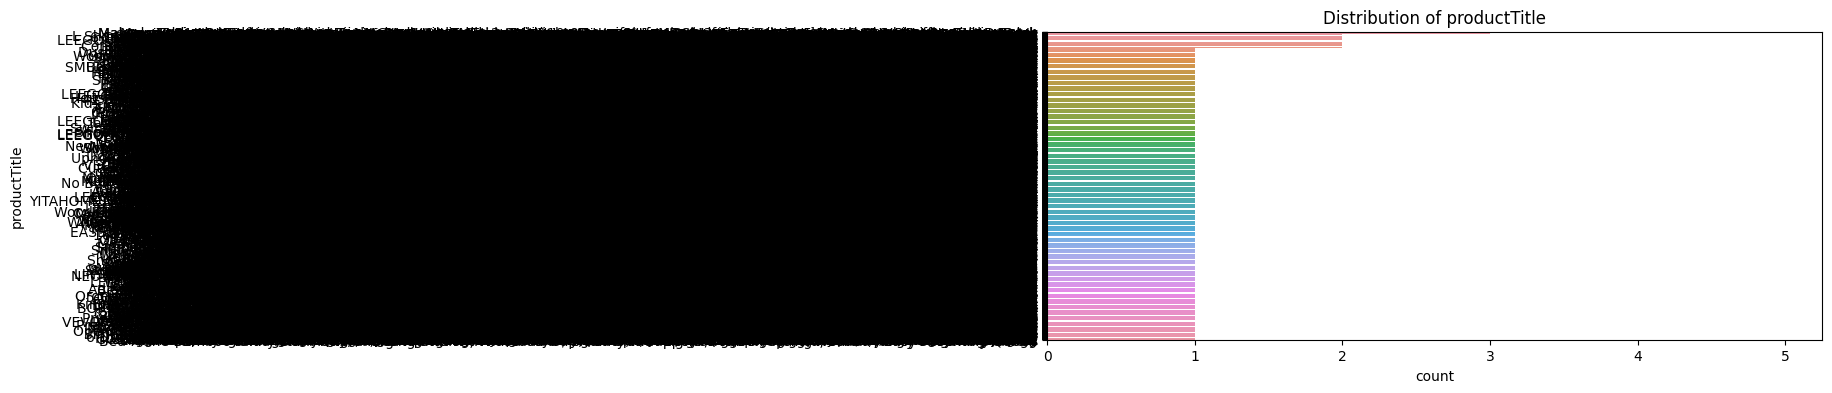

C:\Users\Tarun Dev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Tarun Dev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


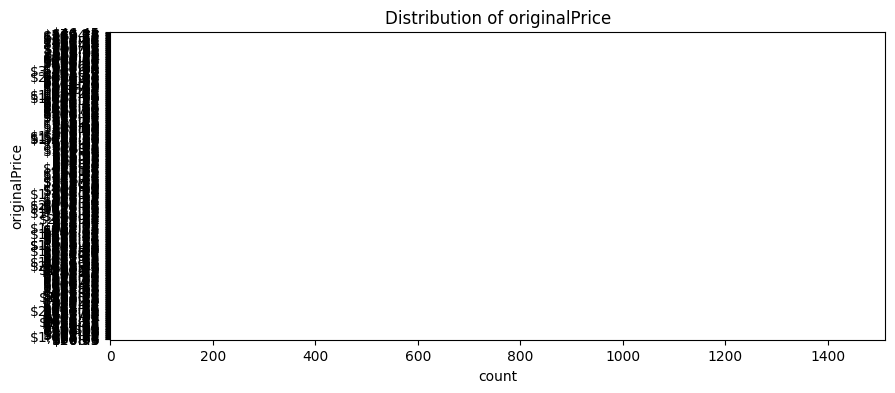

C:\Users\Tarun Dev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Tarun Dev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


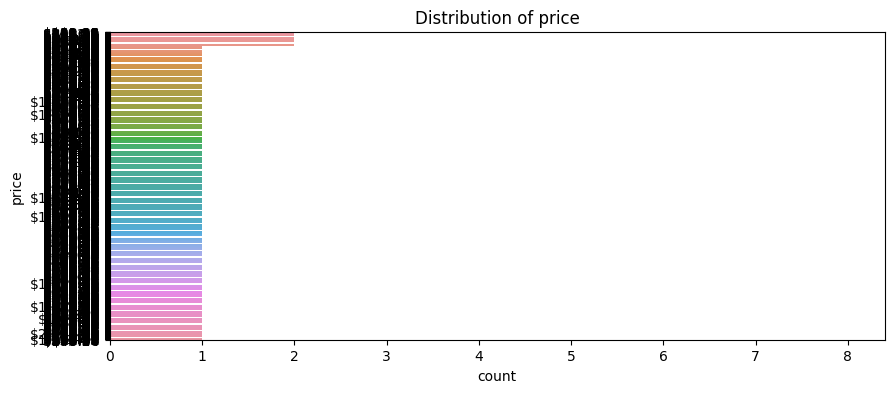

C:\Users\Tarun Dev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Tarun Dev\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


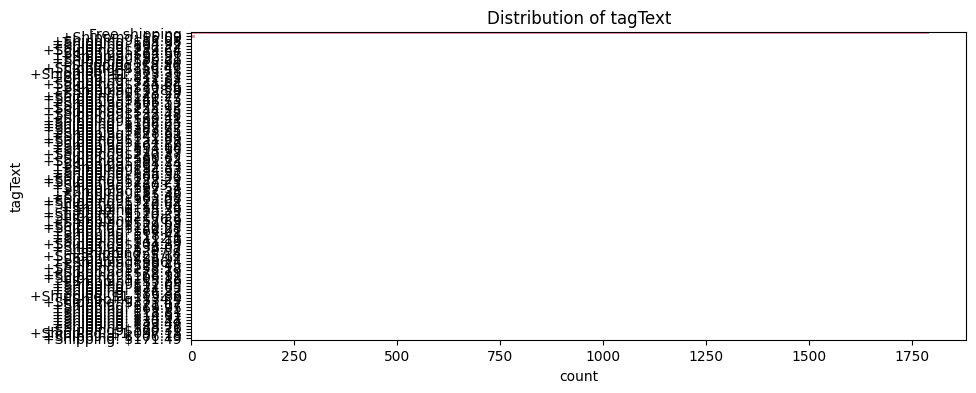

In [7]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Histogram for numerical columns
df[numerical_cols].hist(figsize=(15, 10), bins=20)
plt.show()

# Countplot for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

## 6. Bivariate Analysis

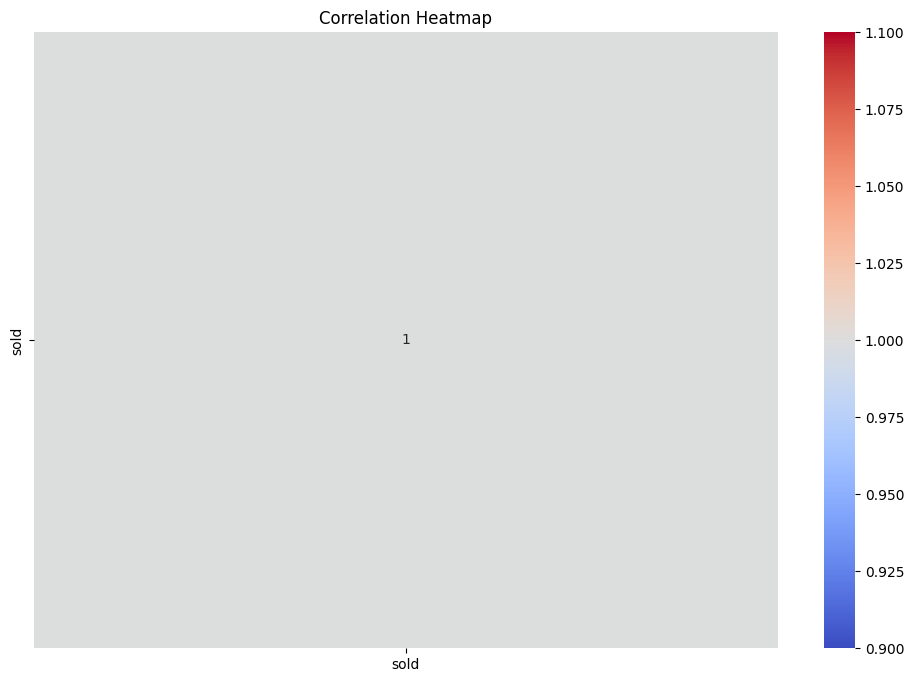

In [8]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Example: Sales vs. Profit scatter plot
if 'Sales' in df.columns and 'Profit' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='Sales', y='Profit', data=df)
    plt.title('Sales vs Profit')
    plt.show()

## 7. Saving the Final Cleaned Dataset

In [9]:
df.to_csv('final_cleaned_furniture_data_for_powerbi.csv', index=False)